# Project: TMDB movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> TMDb movie data is dataset contains movies information collected from TMDb and the information is about 10     thousand and more, in this dataset it include: information like the revenue and budget for every movie as well the genres of the movie and movie title and different information like the release date of the movie and vote average and popularit of the movie. This dataset could be dealing with in different ways I prefered in way that compare the data based on the revenue and budget and few different factors. also this dataset has new challanges and 
problems to fix and I enjoyed in analyzed this dataset.
>
> ***Here's my questions :***
>
> ***Q1:*** Do high budget gets higher vote counts , vote average , popularity ? if yes by how much ? <br>
  ***Q2:*** Do movies after year 2009 gets higher revenue ? <br>
  ***Q3:*** Which genres are most popular from 1966 to 2015 ? <br>
  ***Q4:*** Which types of genres gets higher revenue and budget ? <br>
>
> In these questions I start first in comparing budget with different properties and how the budget is effect these factors. <br> then i start to compare revenue for movies after 2009 revenue of movies started inflation over time.<br> after that I compared the movies genres and I took the three most popular genres.<br> at the end I compared the movies based on genres and with different factors which is the revenue and budget and I took the three most genres with higher revenue and budget.


### import needed libraries and read the dataset csv file


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling




### General Properties

In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.shape

(10866, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Drop Extraneous Columns

In [7]:
df.drop(['homepage', 'tagline', 'overview' ,'release_date' , 'production_companies' , 'keywords', 'cast', 'director', 'imdb_id', 'budget_adj' , 'revenue_adj' ],axis = 1 , inplace=True)
df

,id,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,95,Documentary,11,7.4,1966
10862,20379,0.065543,0,0,Grand Prix,176,Action|Adventure|Drama,20,5.7,1966
10863,39768,0.065141,0,0,Beregis Avtomobilya,94,Mystery|Comedy,11,6.5,1966
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",80,Action|Comedy,22,5.4,1966


### Check if there is any datatype need to fix

In [8]:
df.dtypes

id                  int64
popularity        float64
budget              int64
revenue             int64
original_title     object
runtime             int64
genres             object
vote_count          int64
vote_average      float64
release_year        int64
dtype: object

## Deduplicate Data

In [9]:
sum(df.duplicated())

1

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
sum(df.duplicated())

0

### Drop Rows with Missing Values

In [12]:
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [13]:
df.dropna(inplace = True)
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [14]:
df = df[( df.budget != 0 ) & ( df.revenue != 0 )]

I treated the rows with ***revenue and budget equal to zero as missing value***

## Fix Multiple Values in one row

Read [this]( https://riptutorial.com/pandas/example/25462/split--reshape--csv-strings-in-columns-into-multiple-rows--having-one-element-per-row ) it helped me in extract the data into different rows in Pandas for the next step.

In [15]:
# Takes dataframe, column name that include multiple value string in one row, and sign that separate multiple values
# and seperate these multiple value in to different rows in the same columns and then return updated datafram
def seprate_to_different_rows(data_frame, column_name, sign):
    data_frame = \
          (data_frame.set_index(data_frame.columns.drop(column_name,1).tolist())
          [column_name].str.split(sign, expand=True)
          .stack()
          .reset_index()
          .rename(columns={0:column_name})
          .loc[:, data_frame.columns]
          )
    
    return data_frame

In [16]:
Categorical_df = df.copy()
Categorical_df = seprate_to_different_rows(Categorical_df, 'genres', '|')
Categorical_df

,id,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action,5562,6.5,2015
1,135397,32.985763,150000000,1513528810,Jurassic World,124,Adventure,5562,6.5,2015
2,135397,32.985763,150000000,1513528810,Jurassic World,124,Science Fiction,5562,6.5,2015
3,135397,32.985763,150000000,1513528810,Jurassic World,124,Thriller,5562,6.5,2015
4,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,6185,7.1,2015
...,...,...,...,...,...,...,...,...,...,...
10298,5923,0.299911,12000000,20000000,The Sand Pebbles,182,Drama,28,7.0,1966
10299,5923,0.299911,12000000,20000000,The Sand Pebbles,182,War,28,7.0,1966
10300,5923,0.299911,12000000,20000000,The Sand Pebbles,182,Romance,28,7.0,1966
10301,2161,0.207257,5115000,12000000,Fantastic Voyage,100,Adventure,42,6.7,1966


### Check if there is duplicated data after the catogrization of the data

In [17]:
sum(Categorical_df.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis

In [18]:
# Note : I used df for general and Categorical_df for the data catogrized based on genres
df.describe().astype(int)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3854,3854,3854,3854,3854,3854,3854,3854
mean,39888,1,37203696,107686616,109,527,6,2001
std,67222,1,42208224,176539346,19,879,0,11
min,5,0,1,2,15,10,2,1960
25%,6073,0,10000000,13600032,95,71,5,1995
50%,11321,0,24000000,44800002,106,204,6,2004
75%,38573,1,50000000,124212540,119,580,6,2010
max,417859,32,425000000,2781505847,338,9767,8,2015


### Histogram for various features

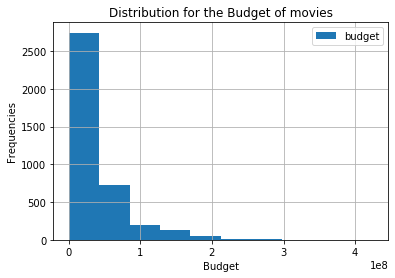

In [19]:
df.budget.hist(label='budget');
plt.title('Distribution for the Budget of movies');
plt.xlabel('Budget');
plt.ylabel('Frequencies');
plt.legend();

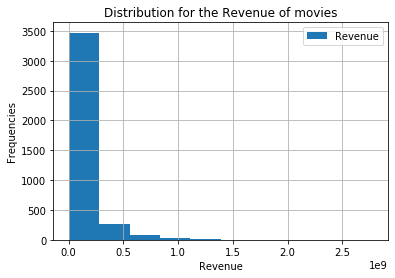

In [20]:
df.revenue.hist(label='Revenue');
plt.title('Distribution for the Revenue of movies');
plt.xlabel('Revenue');
plt.ylabel('Frequencies');
plt.legend();

Both the budget and the revenue are skewed to the right but budget is more skewed even though ***the revenue result is in billion and the budget is in million.***

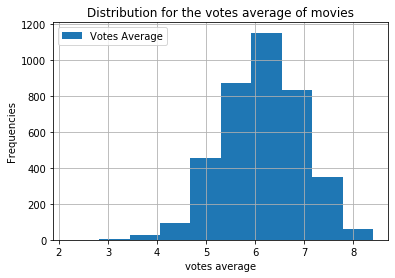

In [21]:
df.vote_average.hist(label='Votes Average');
plt.title('Distribution for the votes average of movies');
plt.xlabel('votes average');
plt.ylabel('Frequencies');
plt.legend();

the vote averages frequencies are more in Between 5.5 and 7.2

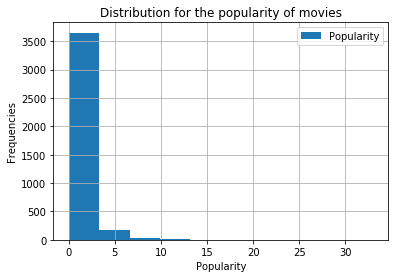

In [22]:
df.popularity.hist(label='Popularity');
plt.title('Distribution for the popularity of movies');
plt.xlabel('Popularity');
plt.ylabel('Frequencies');
plt.legend();

the popularity frequencies are more in Between 0 and 2.5

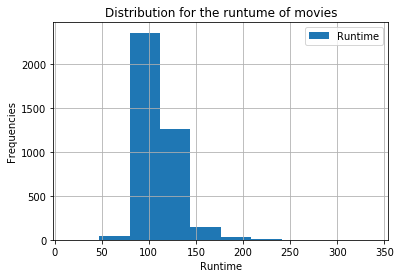

In [23]:
df.runtime.hist(label='Runtime');
plt.title('Distribution for the runtume of movies');
plt.xlabel('Runtime');
plt.ylabel('Frequencies');
plt.legend();

Movies usally between 90 to 110 mintues.

### ScatterPlot of revenue against budget

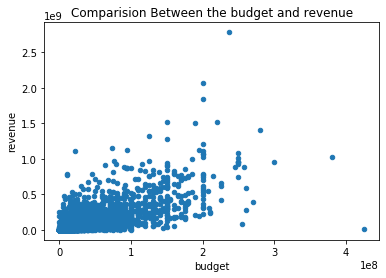

In [24]:
df.plot(kind='scatter', x= 'budget' , y='revenue');
plt.title('Comparision Between the budget and revenue');

the graph shows that is there ***positive correlation.***
which means with higher budget for the movie the revenue increases.

### ScatterPlot of popularity against budget

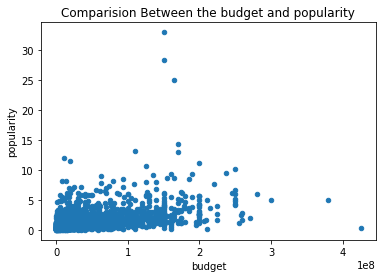

In [25]:
df.plot(kind='scatter', x= 'budget' , y='popularity');
plt.title('Comparision Between the budget and popularity');

the graph shows that is there ***positive correlation.***
which means with higher budget for the movie the higher populratiy the movie gets.

### #1: Do high budget gets higher vote counts , vote average , popularity ? if yes by how much ? 

***Based on Vote Counts***

In [26]:
median = df.budget.median()
high = df[df.budget >= median]
low  = df[df.budget < median]

In [27]:
low_vote_count = low['vote_count'].mean()
high_vote_count = high['vote_count'].mean()
high['vote_count'].mean() - low['vote_count'].mean()

529.5762359663127

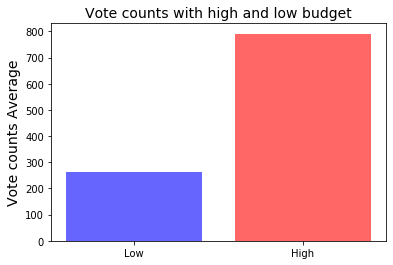

In [28]:
locations = [1, 2]
heights = [low_vote_count, high_vote_count]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels , color=['blue' , 'red'] , alpha= 0.6)
plt.ylabel('Vote counts Average', fontsize=14);
plt.title('Vote counts with high and low budget', fontsize=14);

So based on the graph yes with ***higher budget on movies gets higher vote counts*** and by ***529.57 votes more.***

***Based on Vote Average***

In [29]:
low_vote_average = low['vote_average'].mean()
high_vote_average = high['vote_average'].mean()
high['vote_average'].mean() - low['vote_average'].mean()

-0.07628665024962

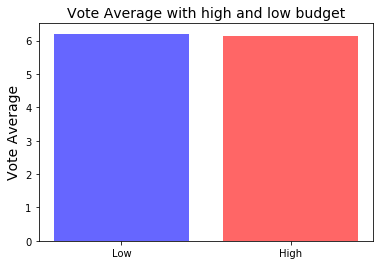

In [30]:
locations = [1, 2]
heights = [low_vote_average, high_vote_average]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels , color=['blue' , 'red'] , alpha= 0.6)
plt.ylabel('Vote Average', fontsize=14);
plt.title('Vote Average with high and low budget', fontsize=14);

So based on the graph and the result the answer is no with ***higher budget doesn't means that it will be higher vote average.*** 

In [31]:
low_popularity = low['popularity'].mean()
high_popularity= high['popularity'].mean()
high['popularity'].mean() - low['popularity'].mean()

0.759614829082022

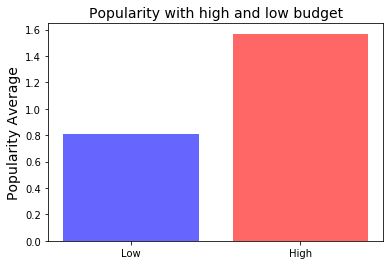

In [32]:
locations = [1, 2]
heights = [low_popularity, high_popularity]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels , color=['blue' , 'red'] , alpha= 0.6)
plt.ylabel('Popularity Average', fontsize=14);
plt.title('Popularity with high and low budget', fontsize=14);

So based on the graph the answer is yes with ***higher budget the movie get higher popularity*** and ***by 0.759 more***

### #2: Do movies after year 2009 gets higher revenue ? 

i did this because of year 2010 and after the revenue increases based on the data I have seen also accounting for inflation over time. 

In [33]:
After_2009 = df.release_year > 2009
before_2009 = df.release_year <= 2009

In [34]:
revenue_after_2009 = df.revenue[After_2009].mean()
revenue_before_2009 = df.revenue[before_2009].mean()

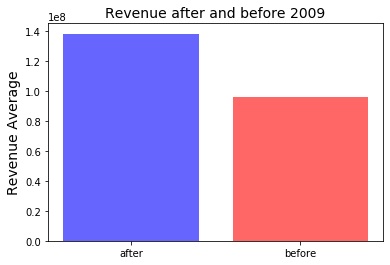

In [35]:
ocations = [1, 2]
heights = [revenue_after_2009, revenue_before_2009]
labels = ['after', 'before']
plt.bar(locations, heights, tick_label=labels , color=['blue' , 'red'] , alpha= 0.6)
plt.ylabel('Revenue Average', fontsize=14);
plt.title('Revenue after and before 2009', fontsize=14);

So based on the graph ***the revenue after 2009 is higher***.

### #3: Which genres are most popular from 1966 to 2015 ?

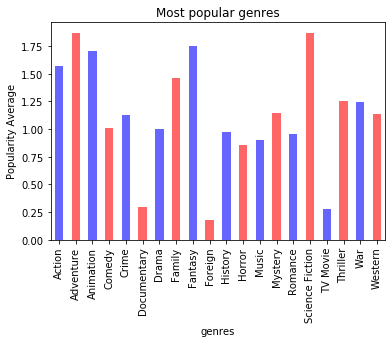

In [36]:
Categorical_df.groupby('genres').popularity.mean().plot(kind='bar', alpha=.6 , color=['blue','red']);
plt.ylabel('Popularity Average');
plt.title('Most popular genres');

as it shows in the graph the most popular genres is ***Adventure, Science Fiction , Fantasy.***

### #4: Which types of genres gets higher revenue and budget ?

***Based on budget***

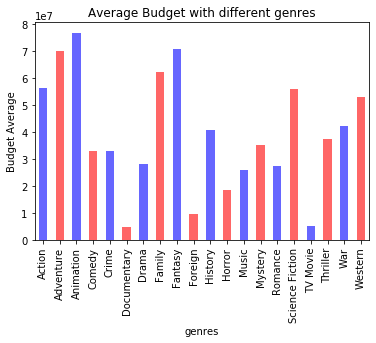

In [37]:
Categorical_df.groupby('genres').budget.mean().astype(int).plot(kind='bar', alpha=.6 , color=['blue','red']);
plt.ylabel('Budget Average');
plt.title('Average Budget with different genres');

***Based on Revenue***

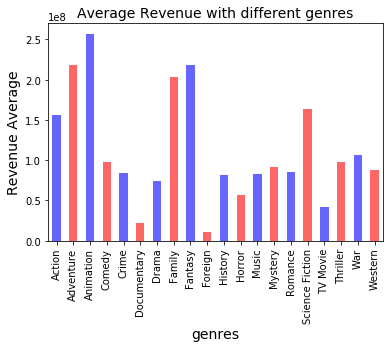

In [38]:
Categorical_df.groupby('genres').revenue.mean().astype(int).plot(kind='bar', alpha=.6 , color=['blue','red'] );
plt.ylabel('Revenue Average' , fontsize=14);
plt.xlabel('genres' , fontsize=14)
plt.title('Average Revenue with different genres', fontsize=14);

As it shows in the both graphs the ***Animation, Adventure and Fantasy get highest Budget and Revenue.***

<a id='conclusions'></a>
## Conclusions


In the beginning I examined the budget with different features it's effect on different factors for movies and how it could the movies it self, and I found the movies with higher budget gets higher vote counts and popularity than the cheaper one and it gets similar vote average. <br><br>generally I made my analyzation based on 'budget' and the 'revenue' and 'popularity', then based on that I used them with different genres to see which kinds of movies people more interested about and most known. <br><br> at the end I have also analyzed the revenue based on different 'released_year' and I found with the time goes on the revenue of movies get higher revenue.

## Limitations


<ul>
<li>
I have used TMBD Movies dataset for my analysis and worked with popularity, revenue and budget. my analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.
</li>
<li>
Dropping missing or Null values might skew my analysis and could show unintentional bias towards the relationship being analyzed.
</li>
</ul>
